In [1]:
from Modules import *

1. Read in NQ

In [2]:
#Read in NQ
# nq = pd.read_csv("NQ_full_1min_continuous_UNadjusted.txt")
nq = pd.read_csv("SPX_1min.txt")
nq.dropna(inplace=True)
nq['Year'] = nq['Date'].astype(str).str[0:4].astype(int) 
nq['Month'] = nq['Date'].astype(str).str[5:7].astype(int)
nq['Day'] = nq['Date'].astype(str).str[8:10].astype(int) 

nq['Hour'] = nq['Time'].astype(str).str[0:2].astype('Int64')*100
nq['Minute'] = nq['Time'].astype(str).str[3:5].astype('Int64') 

nq['HHMM'] = nq['Hour']+nq['Minute']

#nq = nq.loc[(nq['HHMM'] >= 930) & (nq['HHMM'] <= 1559)]

cycleDay = []
day = np.array(nq['Day'])

for i in range(len(nq)):
    cycleDay.append(0)
    if(day[i] != day[i-1]):
        cycleDay[i] = cycleDay[i-1]+1
    else:
        cycleDay[i] = cycleDay[i-1]
nq['cycleDay'] = cycleDay

intraDayCycle = []
HHMM = np.array(nq['HHMM'])

for i in range(len(nq)):
    intraDayCycle.append(0)
    if(HHMM[i] > HHMM[i-1]):
        intraDayCycle[i] = intraDayCycle[i-1]+1
    else:
        intraDayCycle[i] = 0
nq['intraDayCycle'] = intraDayCycle

ref = []
intraDayCycle = np.array(nq['intraDayCycle'])
openPr = np.array(nq['Open'])

for i in range(len(nq)):
    ref.append(0)
    if(intraDayCycle[i] == 0):
        ref[i] = openPr[i]
    else:
        ref[i] = ref[i-1]

nq['openPrice'] = ref
nq['move'] = abs((nq['Close'] / nq['openPrice'])-1)

x = np.arange(929,1600,1)

for i in range(len(x)):
    if (i <= 10 or i%100 ==0):
        print(str(0+i))
    d = nq.loc[nq['HHMM'] == x[i]]
    xx = len(d)>0
    if(xx ==True):
        d = d[['cycleDay','HHMM','move']]
        d['rollingSMA'] = d['move'].rolling(14).mean()
        d = d.drop(columns=['move'], axis=1)
        nq = pd.merge(nq,d,left_on= ["cycleDay","HHMM"],right_on= ["cycleDay","HHMM"], how='left')
        nq = nq.rename(columns={'rollingSMA':'sigma'+str(i)})

nq.to_csv("nq.csv", index = False)
# nq
# # nq.shape
# nq.head(50)

0
1
2
3
4
5
6
7
8
9
10
100
200
300
400
500
600


2. Calculate Average Move 

In [10]:
df = pd.read_csv("nq.csv")
print("Calculate Average Move")
df['aveMove'] = df[["sigma0","sigma1","sigma2","sigma3","sigma4","sigma5","sigma6","sigma7","sigma8","sigma9","sigma10","sigma11","sigma12","sigma13","sigma14","sigma15","sigma16","sigma17","sigma18","sigma19","sigma20","sigma21","sigma22","sigma23","sigma24","sigma25","sigma26","sigma27","sigma28","sigma29","sigma30","sigma71","sigma72","sigma73","sigma74","sigma75","sigma76","sigma77","sigma78","sigma79","sigma80","sigma81","sigma82","sigma83","sigma84","sigma85","sigma86","sigma87","sigma88","sigma89","sigma90","sigma91","sigma92","sigma93","sigma94","sigma95","sigma96","sigma97","sigma98","sigma99","sigma100","sigma101","sigma102","sigma103","sigma104","sigma105","sigma106","sigma107","sigma108","sigma109","sigma110","sigma111","sigma112","sigma113","sigma114","sigma115","sigma116","sigma117","sigma118","sigma119","sigma120","sigma121","sigma122","sigma123","sigma124","sigma125","sigma126","sigma127","sigma128","sigma129","sigma130","sigma171","sigma172","sigma173","sigma174","sigma175","sigma176","sigma177","sigma178","sigma179","sigma180","sigma181","sigma182","sigma183","sigma184","sigma185","sigma186","sigma187","sigma188","sigma189","sigma190","sigma191","sigma192","sigma193","sigma194","sigma195","sigma196","sigma197","sigma198","sigma199","sigma200","sigma201","sigma202","sigma203","sigma204","sigma205","sigma206","sigma207","sigma208","sigma209","sigma210","sigma211","sigma212","sigma213","sigma214","sigma215","sigma216","sigma217","sigma218","sigma219","sigma220","sigma221","sigma222","sigma223","sigma224","sigma225","sigma226","sigma227","sigma228","sigma229","sigma230","sigma271","sigma272","sigma273","sigma274","sigma275","sigma276","sigma277","sigma278","sigma279","sigma280","sigma281","sigma282","sigma283","sigma284","sigma285","sigma286","sigma287","sigma288","sigma289","sigma290","sigma291","sigma292","sigma293","sigma294","sigma295","sigma296","sigma297","sigma298","sigma299","sigma300","sigma301","sigma302","sigma303","sigma304","sigma305","sigma306","sigma307","sigma308","sigma309","sigma310","sigma311","sigma312","sigma313","sigma314","sigma315","sigma316","sigma317","sigma318","sigma319","sigma320","sigma321","sigma322","sigma323","sigma324","sigma325","sigma326","sigma327","sigma328","sigma329","sigma330","sigma371","sigma372","sigma373","sigma374","sigma375","sigma376","sigma377","sigma378","sigma379","sigma380","sigma381","sigma382","sigma383","sigma384","sigma385","sigma386","sigma387","sigma388","sigma389","sigma390","sigma391","sigma392","sigma393","sigma394","sigma395","sigma396","sigma397","sigma398","sigma399","sigma400","sigma401","sigma402","sigma403","sigma404","sigma405","sigma406","sigma407","sigma408","sigma409","sigma410","sigma411","sigma412","sigma413","sigma414","sigma415","sigma416","sigma417","sigma418","sigma419","sigma420","sigma421","sigma422","sigma423","sigma424","sigma425","sigma426","sigma427","sigma428","sigma429","sigma430","sigma471","sigma472","sigma473","sigma474","sigma475","sigma476","sigma477","sigma478","sigma479","sigma480","sigma481","sigma482","sigma483","sigma484","sigma485","sigma486","sigma487","sigma488","sigma489","sigma490","sigma491","sigma492","sigma493","sigma494","sigma495","sigma496","sigma497","sigma498","sigma499","sigma500","sigma501","sigma502","sigma503","sigma504","sigma505","sigma506","sigma507","sigma508","sigma509","sigma510","sigma511","sigma512","sigma513","sigma514","sigma515","sigma516","sigma517","sigma518","sigma519","sigma520","sigma521","sigma522","sigma523","sigma524","sigma525","sigma526","sigma527","sigma528","sigma529","sigma530","sigma571","sigma572","sigma573","sigma574","sigma575","sigma576","sigma577","sigma578","sigma579","sigma580","sigma581","sigma582","sigma583","sigma584","sigma585","sigma586","sigma587","sigma588","sigma589","sigma590","sigma591","sigma592","sigma593","sigma594","sigma595","sigma596","sigma597","sigma598","sigma599","sigma600","sigma601","sigma602","sigma603","sigma604","sigma605","sigma606","sigma607","sigma608","sigma609","sigma610","sigma611","sigma612","sigma613","sigma614","sigma615","sigma616","sigma617","sigma618","sigma619","sigma620","sigma621","sigma622","sigma623","sigma624","sigma625","sigma626","sigma627","sigma628","sigma629","sigma630"]].max(axis=1)
df = df.drop(columns=["move","sigma0","sigma1","sigma2","sigma3","sigma4","sigma5","sigma6","sigma7","sigma8","sigma9","sigma10","sigma11","sigma12","sigma13","sigma14","sigma15","sigma16","sigma17","sigma18","sigma19","sigma20","sigma21","sigma22","sigma23","sigma24","sigma25","sigma26","sigma27","sigma28","sigma29","sigma30","sigma71","sigma72","sigma73","sigma74","sigma75","sigma76","sigma77","sigma78","sigma79","sigma80","sigma81","sigma82","sigma83","sigma84","sigma85","sigma86","sigma87","sigma88","sigma89","sigma90","sigma91","sigma92","sigma93","sigma94","sigma95","sigma96","sigma97","sigma98","sigma99","sigma100","sigma101","sigma102","sigma103","sigma104","sigma105","sigma106","sigma107","sigma108","sigma109","sigma110","sigma111","sigma112","sigma113","sigma114","sigma115","sigma116","sigma117","sigma118","sigma119","sigma120","sigma121","sigma122","sigma123","sigma124","sigma125","sigma126","sigma127","sigma128","sigma129","sigma130","sigma171","sigma172","sigma173","sigma174","sigma175","sigma176","sigma177","sigma178","sigma179","sigma180","sigma181","sigma182","sigma183","sigma184","sigma185","sigma186","sigma187","sigma188","sigma189","sigma190","sigma191","sigma192","sigma193","sigma194","sigma195","sigma196","sigma197","sigma198","sigma199","sigma200","sigma201","sigma202","sigma203","sigma204","sigma205","sigma206","sigma207","sigma208","sigma209","sigma210","sigma211","sigma212","sigma213","sigma214","sigma215","sigma216","sigma217","sigma218","sigma219","sigma220","sigma221","sigma222","sigma223","sigma224","sigma225","sigma226","sigma227","sigma228","sigma229","sigma230","sigma271","sigma272","sigma273","sigma274","sigma275","sigma276","sigma277","sigma278","sigma279","sigma280","sigma281","sigma282","sigma283","sigma284","sigma285","sigma286","sigma287","sigma288","sigma289","sigma290","sigma291","sigma292","sigma293","sigma294","sigma295","sigma296","sigma297","sigma298","sigma299","sigma300","sigma301","sigma302","sigma303","sigma304","sigma305","sigma306","sigma307","sigma308","sigma309","sigma310","sigma311","sigma312","sigma313","sigma314","sigma315","sigma316","sigma317","sigma318","sigma319","sigma320","sigma321","sigma322","sigma323","sigma324","sigma325","sigma326","sigma327","sigma328","sigma329","sigma330","sigma371","sigma372","sigma373","sigma374","sigma375","sigma376","sigma377","sigma378","sigma379","sigma380","sigma381","sigma382","sigma383","sigma384","sigma385","sigma386","sigma387","sigma388","sigma389","sigma390","sigma391","sigma392","sigma393","sigma394","sigma395","sigma396","sigma397","sigma398","sigma399","sigma400","sigma401","sigma402","sigma403","sigma404","sigma405","sigma406","sigma407","sigma408","sigma409","sigma410","sigma411","sigma412","sigma413","sigma414","sigma415","sigma416","sigma417","sigma418","sigma419","sigma420","sigma421","sigma422","sigma423","sigma424","sigma425","sigma426","sigma427","sigma428","sigma429","sigma430","sigma471","sigma472","sigma473","sigma474","sigma475","sigma476","sigma477","sigma478","sigma479","sigma480","sigma481","sigma482","sigma483","sigma484","sigma485","sigma486","sigma487","sigma488","sigma489","sigma490","sigma491","sigma492","sigma493","sigma494","sigma495","sigma496","sigma497","sigma498","sigma499","sigma500","sigma501","sigma502","sigma503","sigma504","sigma505","sigma506","sigma507","sigma508","sigma509","sigma510","sigma511","sigma512","sigma513","sigma514","sigma515","sigma516","sigma517","sigma518","sigma519","sigma520","sigma521","sigma522","sigma523","sigma524","sigma525","sigma526","sigma527","sigma528","sigma529","sigma530","sigma571","sigma572","sigma573","sigma574","sigma575","sigma576","sigma577","sigma578","sigma579","sigma580","sigma581","sigma582","sigma583","sigma584","sigma585","sigma586","sigma587","sigma588","sigma589","sigma590","sigma591","sigma592","sigma593","sigma594","sigma595","sigma596","sigma597","sigma598","sigma599","sigma600","sigma601","sigma602","sigma603","sigma604","sigma605","sigma606","sigma607","sigma608","sigma609","sigma610","sigma611","sigma612","sigma613","sigma614","sigma615","sigma616","sigma617","sigma618","sigma619","sigma620","sigma621","sigma622","sigma623","sigma624","sigma625","sigma626","sigma627","sigma628","sigma629","sigma630"],axis=1)
df = df.dropna()
df.to_csv("df.csv")
print("...")
#xxx = [930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559]
xxx = np.arange(929,1600,1)
print("Assign the true Average Move")
for i in range(len(xxx)):
    if (i <= 10 or i%100 ==0):
        print(str(0+i))
    d = df.loc[nq['HHMM'] == xxx[i]]
    d = d[['HHMM','cycleDay','aveMove']]
    d['cycleDayPlus'] = d['cycleDay']+1
    d = d.drop(columns=['cycleDay'], axis=1)
    d = d.rename(columns={'cycleDayPlus':'cycleDay'})
    df = pd.merge(df,d,left_on= ["cycleDay","HHMM"],right_on= ["cycleDay","HHMM"], how='left')
    df = df.rename(columns={'aveMove_x' : 'aveMove', 'aveMove_y':'aveMove_'+str(i)})
df.to_csv("df_1.csv", index = False)
print("Done")

print("")
print("Check that the number of fields is: ",str((len(xxx))))
print("")

Calculate Average Move
...
Assign the true Average Move
0
1
2
3
4
5
6
7
8
9
10
100
200
300
400
500
600
Done

Check that the number of fields is:  671



3. Calculate Sigma

In [13]:
df = pd.read_csv("df_1.csv")
print("Calculate Sigma")
df['Sigma'] = df[["aveMove_0","aveMove_1","aveMove_2","aveMove_3","aveMove_4","aveMove_5","aveMove_6","aveMove_7","aveMove_8","aveMove_9","aveMove_10","aveMove_11","aveMove_12","aveMove_13","aveMove_14","aveMove_15","aveMove_16","aveMove_17","aveMove_18","aveMove_19","aveMove_20","aveMove_21","aveMove_22","aveMove_23","aveMove_24","aveMove_25","aveMove_26","aveMove_27","aveMove_28","aveMove_29","aveMove_30","aveMove_31","aveMove_32","aveMove_33","aveMove_34","aveMove_35","aveMove_36","aveMove_37","aveMove_38","aveMove_39","aveMove_40","aveMove_41","aveMove_42","aveMove_43","aveMove_44","aveMove_45","aveMove_46","aveMove_47","aveMove_48","aveMove_49","aveMove_50","aveMove_51","aveMove_52","aveMove_53","aveMove_54","aveMove_55","aveMove_56","aveMove_57","aveMove_58","aveMove_59","aveMove_60","aveMove_61","aveMove_62","aveMove_63","aveMove_64","aveMove_65","aveMove_66","aveMove_67","aveMove_68","aveMove_69","aveMove_70","aveMove_71","aveMove_72","aveMove_73","aveMove_74","aveMove_75","aveMove_76","aveMove_77","aveMove_78","aveMove_79","aveMove_80","aveMove_81","aveMove_82","aveMove_83","aveMove_84","aveMove_85","aveMove_86","aveMove_87","aveMove_88","aveMove_89","aveMove_90","aveMove_91","aveMove_92","aveMove_93","aveMove_94","aveMove_95","aveMove_96","aveMove_97","aveMove_98","aveMove_99","aveMove_100","aveMove_101","aveMove_102","aveMove_103","aveMove_104","aveMove_105","aveMove_106","aveMove_107","aveMove_108","aveMove_109","aveMove_110","aveMove_111","aveMove_112","aveMove_113","aveMove_114","aveMove_115","aveMove_116","aveMove_117","aveMove_118","aveMove_119","aveMove_120","aveMove_121","aveMove_122","aveMove_123","aveMove_124","aveMove_125","aveMove_126","aveMove_127","aveMove_128","aveMove_129","aveMove_130","aveMove_131","aveMove_132","aveMove_133","aveMove_134","aveMove_135","aveMove_136","aveMove_137","aveMove_138","aveMove_139","aveMove_140","aveMove_141","aveMove_142","aveMove_143","aveMove_144","aveMove_145","aveMove_146","aveMove_147","aveMove_148","aveMove_149","aveMove_150","aveMove_151","aveMove_152","aveMove_153","aveMove_154","aveMove_155","aveMove_156","aveMove_157","aveMove_158","aveMove_159","aveMove_160","aveMove_161","aveMove_162","aveMove_163","aveMove_164","aveMove_165","aveMove_166","aveMove_167","aveMove_168","aveMove_169","aveMove_170","aveMove_171","aveMove_172","aveMove_173","aveMove_174","aveMove_175","aveMove_176","aveMove_177","aveMove_178","aveMove_179","aveMove_180","aveMove_181","aveMove_182","aveMove_183","aveMove_184","aveMove_185","aveMove_186","aveMove_187","aveMove_188","aveMove_189","aveMove_190","aveMove_191","aveMove_192","aveMove_193","aveMove_194","aveMove_195","aveMove_196","aveMove_197","aveMove_198","aveMove_199","aveMove_200","aveMove_201","aveMove_202","aveMove_203","aveMove_204","aveMove_205","aveMove_206","aveMove_207","aveMove_208","aveMove_209","aveMove_210","aveMove_211","aveMove_212","aveMove_213","aveMove_214","aveMove_215","aveMove_216","aveMove_217","aveMove_218","aveMove_219","aveMove_220","aveMove_221","aveMove_222","aveMove_223","aveMove_224","aveMove_225","aveMove_226","aveMove_227","aveMove_228","aveMove_229","aveMove_230","aveMove_231","aveMove_232","aveMove_233","aveMove_234","aveMove_235","aveMove_236","aveMove_237","aveMove_238","aveMove_239","aveMove_240","aveMove_241","aveMove_242","aveMove_243","aveMove_244","aveMove_245","aveMove_246","aveMove_247","aveMove_248","aveMove_249","aveMove_250","aveMove_251","aveMove_252","aveMove_253","aveMove_254","aveMove_255","aveMove_256","aveMove_257","aveMove_258","aveMove_259","aveMove_260","aveMove_261","aveMove_262","aveMove_263","aveMove_264","aveMove_265","aveMove_266","aveMove_267","aveMove_268","aveMove_269","aveMove_270","aveMove_271","aveMove_272","aveMove_273","aveMove_274","aveMove_275","aveMove_276","aveMove_277","aveMove_278","aveMove_279","aveMove_280","aveMove_281","aveMove_282","aveMove_283","aveMove_284","aveMove_285","aveMove_286","aveMove_287","aveMove_288","aveMove_289","aveMove_290","aveMove_291","aveMove_292","aveMove_293","aveMove_294","aveMove_295","aveMove_296","aveMove_297","aveMove_298","aveMove_299","aveMove_300","aveMove_301","aveMove_302","aveMove_303","aveMove_304","aveMove_305","aveMove_306","aveMove_307","aveMove_308","aveMove_309","aveMove_310","aveMove_311","aveMove_312","aveMove_313","aveMove_314","aveMove_315","aveMove_316","aveMove_317","aveMove_318","aveMove_319","aveMove_320","aveMove_321","aveMove_322","aveMove_323","aveMove_324","aveMove_325","aveMove_326","aveMove_327","aveMove_328","aveMove_329","aveMove_330","aveMove_331","aveMove_332","aveMove_333","aveMove_334","aveMove_335","aveMove_336","aveMove_337","aveMove_338","aveMove_339","aveMove_340","aveMove_341","aveMove_342","aveMove_343","aveMove_344","aveMove_345","aveMove_346","aveMove_347","aveMove_348","aveMove_349","aveMove_350","aveMove_351","aveMove_352","aveMove_353","aveMove_354","aveMove_355","aveMove_356","aveMove_357","aveMove_358","aveMove_359","aveMove_360","aveMove_361","aveMove_362","aveMove_363","aveMove_364","aveMove_365","aveMove_366","aveMove_367","aveMove_368","aveMove_369","aveMove_370","aveMove_371","aveMove_372","aveMove_373","aveMove_374","aveMove_375","aveMove_376","aveMove_377","aveMove_378","aveMove_379","aveMove_380","aveMove_381","aveMove_382","aveMove_383","aveMove_384","aveMove_385","aveMove_386","aveMove_387","aveMove_388","aveMove_389"]].max(axis=1)
df = df.drop(columns=["aveMove_0","aveMove_1","aveMove_2","aveMove_3","aveMove_4","aveMove_5","aveMove_6","aveMove_7","aveMove_8","aveMove_9","aveMove_10","aveMove_11","aveMove_12","aveMove_13","aveMove_14","aveMove_15","aveMove_16","aveMove_17","aveMove_18","aveMove_19","aveMove_20","aveMove_21","aveMove_22","aveMove_23","aveMove_24","aveMove_25","aveMove_26","aveMove_27","aveMove_28","aveMove_29","aveMove_30","aveMove_31","aveMove_32","aveMove_33","aveMove_34","aveMove_35","aveMove_36","aveMove_37","aveMove_38","aveMove_39","aveMove_40","aveMove_41","aveMove_42","aveMove_43","aveMove_44","aveMove_45","aveMove_46","aveMove_47","aveMove_48","aveMove_49","aveMove_50","aveMove_51","aveMove_52","aveMove_53","aveMove_54","aveMove_55","aveMove_56","aveMove_57","aveMove_58","aveMove_59","aveMove_60","aveMove_61","aveMove_62","aveMove_63","aveMove_64","aveMove_65","aveMove_66","aveMove_67","aveMove_68","aveMove_69","aveMove_70","aveMove_71","aveMove_72","aveMove_73","aveMove_74","aveMove_75","aveMove_76","aveMove_77","aveMove_78","aveMove_79","aveMove_80","aveMove_81","aveMove_82","aveMove_83","aveMove_84","aveMove_85","aveMove_86","aveMove_87","aveMove_88","aveMove_89","aveMove_90","aveMove_91","aveMove_92","aveMove_93","aveMove_94","aveMove_95","aveMove_96","aveMove_97","aveMove_98","aveMove_99","aveMove_100","aveMove_101","aveMove_102","aveMove_103","aveMove_104","aveMove_105","aveMove_106","aveMove_107","aveMove_108","aveMove_109","aveMove_110","aveMove_111","aveMove_112","aveMove_113","aveMove_114","aveMove_115","aveMove_116","aveMove_117","aveMove_118","aveMove_119","aveMove_120","aveMove_121","aveMove_122","aveMove_123","aveMove_124","aveMove_125","aveMove_126","aveMove_127","aveMove_128","aveMove_129","aveMove_130","aveMove_131","aveMove_132","aveMove_133","aveMove_134","aveMove_135","aveMove_136","aveMove_137","aveMove_138","aveMove_139","aveMove_140","aveMove_141","aveMove_142","aveMove_143","aveMove_144","aveMove_145","aveMove_146","aveMove_147","aveMove_148","aveMove_149","aveMove_150","aveMove_151","aveMove_152","aveMove_153","aveMove_154","aveMove_155","aveMove_156","aveMove_157","aveMove_158","aveMove_159","aveMove_160","aveMove_161","aveMove_162","aveMove_163","aveMove_164","aveMove_165","aveMove_166","aveMove_167","aveMove_168","aveMove_169","aveMove_170","aveMove_171","aveMove_172","aveMove_173","aveMove_174","aveMove_175","aveMove_176","aveMove_177","aveMove_178","aveMove_179","aveMove_180","aveMove_181","aveMove_182","aveMove_183","aveMove_184","aveMove_185","aveMove_186","aveMove_187","aveMove_188","aveMove_189","aveMove_190","aveMove_191","aveMove_192","aveMove_193","aveMove_194","aveMove_195","aveMove_196","aveMove_197","aveMove_198","aveMove_199","aveMove_200","aveMove_201","aveMove_202","aveMove_203","aveMove_204","aveMove_205","aveMove_206","aveMove_207","aveMove_208","aveMove_209","aveMove_210","aveMove_211","aveMove_212","aveMove_213","aveMove_214","aveMove_215","aveMove_216","aveMove_217","aveMove_218","aveMove_219","aveMove_220","aveMove_221","aveMove_222","aveMove_223","aveMove_224","aveMove_225","aveMove_226","aveMove_227","aveMove_228","aveMove_229","aveMove_230","aveMove_231","aveMove_232","aveMove_233","aveMove_234","aveMove_235","aveMove_236","aveMove_237","aveMove_238","aveMove_239","aveMove_240","aveMove_241","aveMove_242","aveMove_243","aveMove_244","aveMove_245","aveMove_246","aveMove_247","aveMove_248","aveMove_249","aveMove_250","aveMove_251","aveMove_252","aveMove_253","aveMove_254","aveMove_255","aveMove_256","aveMove_257","aveMove_258","aveMove_259","aveMove_260","aveMove_261","aveMove_262","aveMove_263","aveMove_264","aveMove_265","aveMove_266","aveMove_267","aveMove_268","aveMove_269","aveMove_270","aveMove_271","aveMove_272","aveMove_273","aveMove_274","aveMove_275","aveMove_276","aveMove_277","aveMove_278","aveMove_279","aveMove_280","aveMove_281","aveMove_282","aveMove_283","aveMove_284","aveMove_285","aveMove_286","aveMove_287","aveMove_288","aveMove_289","aveMove_290","aveMove_291","aveMove_292","aveMove_293","aveMove_294","aveMove_295","aveMove_296","aveMove_297","aveMove_298","aveMove_299","aveMove_300","aveMove_301","aveMove_302","aveMove_303","aveMove_304","aveMove_305","aveMove_306","aveMove_307","aveMove_308","aveMove_309","aveMove_310","aveMove_311","aveMove_312","aveMove_313","aveMove_314","aveMove_315","aveMove_316","aveMove_317","aveMove_318","aveMove_319","aveMove_320","aveMove_321","aveMove_322","aveMove_323","aveMove_324","aveMove_325","aveMove_326","aveMove_327","aveMove_328","aveMove_329","aveMove_330","aveMove_331","aveMove_332","aveMove_333","aveMove_334","aveMove_335","aveMove_336","aveMove_337","aveMove_338","aveMove_339","aveMove_340","aveMove_341","aveMove_342","aveMove_343","aveMove_344","aveMove_345","aveMove_346","aveMove_347","aveMove_348","aveMove_349","aveMove_350","aveMove_351","aveMove_352","aveMove_353","aveMove_354","aveMove_355","aveMove_356","aveMove_357","aveMove_358","aveMove_359","aveMove_360","aveMove_361","aveMove_362","aveMove_363","aveMove_364","aveMove_365","aveMove_366","aveMove_367","aveMove_368","aveMove_369","aveMove_370","aveMove_371","aveMove_372","aveMove_373","aveMove_374","aveMove_375","aveMove_376","aveMove_377","aveMove_378","aveMove_379","aveMove_380","aveMove_381","aveMove_382","aveMove_383","aveMove_384","aveMove_385","aveMove_386","aveMove_387","aveMove_388","aveMove_389"],axis=1)
#df = df.dropna()
df.to_csv("df2.csv")
print("...")

Calculate Sigma
...


4. Calculate Boundaries

In [14]:
df = pd.read_csv("df2.csv", index_col = 0)

ref = []
intraDayCycle = np.array(df['intraDayCycle'])
closePr = np.array(df['Close'])

for i in range(len(df)):
    ref.append(0)
    if(intraDayCycle[i] == 0):
        ref[i] = closePr[i-1]
    else:
        ref[i] = ref[i-1]

df['closePrice'] = ref
df['Price'] = df[['openPrice','closePrice']].max(axis=1)
df['upperBoundary'] = df['Price'] * (1+df['Sigma'])
df['lowerBoundary'] = df['Price'] * (1-df['Sigma'])

df.to_csv("df3.csv", index=False)

5. Calculate Signal

In [17]:
df = pd.read_csv("df3.csv")
print(len(df))

#df = df.loc[df['cycleDay'] > 15]

hhhh = np.array(df['Hour'])
minute = np.array(df['Minute'])
closePr = np.array(df['Close'])
lowerBound = np.array(df['lowerBoundary'])
upperBound = np.array(df['upperBoundary'])

signal = []

for i in range(len(df)):
    signal.append(0)
    if(
        (closePr[i] > upperBound[i]) &
        (hhhh[i]%1 == 0) #|
        #(minute[i]%30 == 0)
    ):
        signal[i] = 1
    
    elif(
        (closePr[i] < lowerBound[i]) &
        (hhhh[i]%1 == 0) #|
        #(minute[i]%30 == 0)

    ):
        signal[i] = -1
    else:
        signal[i] = 0

df['predSignal'] = signal

################################################################
exitS = []
intraDayCycle = np.array(df['intraDayCycle'])

for i in range(len(df)-1):
    exitS.append(0)
    if(
        ((closePr[i] < lowerBound[i]) &
        (hhhh[i]%1 == 0) #|
        #(minute[i]%30 == 0)
        )
    ):
        exitS[i] = "ExitLong"
    
    elif(
        ((closePr[i] > upperBound[i]) &
        (hhhh[i]%1 == 0) #|
        #(minute[i]%30 == 0)
        )

    ):
        exitS[i] = "ExitShort"
    elif(        
        intraDayCycle[i+1] < intraDayCycle[i]
        ):
        
        exitS[i] = "Exit"
    else:
        exitS[i] = ""

df.drop(df.tail(1).index,inplace=True)


df['Exit'] = exitS

df.to_csv("df4.csv", index=False)

1472989


6. Implement Strategy

Long Results
1.24695528485815
0.510150622134905
1979.353939499656
1527
Short Results
1.0648650931707337
0.41256366723259763
710.4776580001204
1767
Overall Results
1.1418075119296882
0.45780206435944143
2689.8315974997768
3294


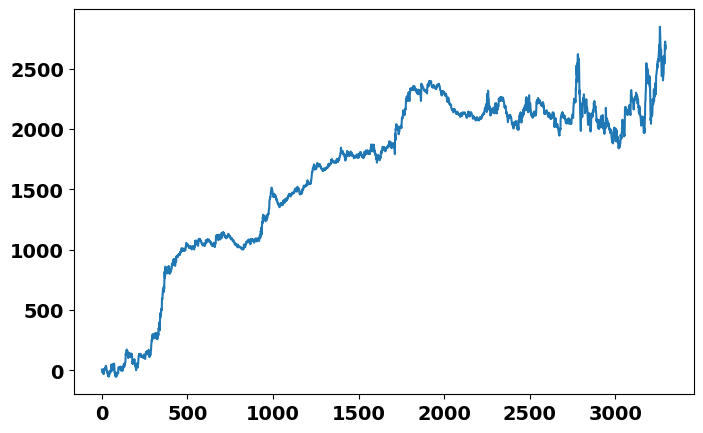

In [18]:
if True:
        dev = pd.read_csv("df4.csv")

        spread = (0.0001)/2
                                            
                    
        signal = np.array(dev['predSignal'])
    
        openLongPrice = []
        stopLossLong = []
        takeProfilLong = []
        exitLongPosition = []
        PnL_Long = []
        exitPriceL = []
        keepOpenLongPosition = []
        signal = np.array(dev['predSignal'])
        openPr = np.array(dev['Open'])
        low = np.array(dev['Low'])
        high = np.array(dev['High'])
        close = np.array(dev['Close'])
        exitP = np.array(dev['Exit'])
        
        for i in range(len(dev)):
            openLongPrice.append(0)
            stopLossLong.append(0)
            takeProfilLong.append(0)
            exitLongPosition.append(0)
            exitPriceL.append(0)
            PnL_Long.append(0)
            keepOpenLongPosition.append(0)
            if(signal[i-1] == 1 and exitLongPosition[i-1] == 0 and keepOpenLongPosition[i-1] == 0):
                openLongPrice[i] = openPr[i]*(1+spread)
                if((exitP[i] == "ExitLong") | (exitP[i] == "Exit")):
                    exitPriceL[i] = close[i]*(1-spread)
                    exitLongPosition[i] = 1
                    PnL_Long[i] = exitPriceL[i]-openLongPrice[i]
                    keepOpenLongPosition[i] = 0
                else:
                    exitPriceL[i] = 0
                    exitLongPosition[i] = 0
                    PnL_Long[i] = 0
                    keepOpenLongPosition[i] = 1
                    
            elif(signal[i] != -1 and keepOpenLongPosition[i-1] == 1):
                openLongPrice[i] = openLongPrice[i-1]
                if((exitP[i] == "ExitLong") | (exitP[i] == "Exit")):
                    exitPriceL[i] = close[i]*(1-spread)
                    exitLongPosition[i] = 1
                    PnL_Long[i] = exitPriceL[i]-openLongPrice[i]
                    keepOpenLongPosition[i] = 0
                else:
                    exitPriceL[i] = 0
                    exitLongPosition[i] = 0
                    PnL_Long[i] = 0
                    keepOpenLongPosition[i] = 1

            elif(signal[i] == -1 and keepOpenLongPosition[i-1] == 1):
                openLongPrice[i] = openLongPrice[i-1]
                if((exitP[i] == "ExitLong") | (exitP[i] == "Exit")):
                    exitPriceL[i] = close[i]*(1-spread)
                    exitLongPosition[i] = 1
                    PnL_Long[i] = exitPriceL[i]-openLongPrice[i]
                    keepOpenLongPosition[i] = 0
                else:
                    exitPriceL[i] = 0
                    exitLongPosition[i] = 0
                    PnL_Long[i] = 0
                    keepOpenLongPosition[i] = 1

            elif(signal[i-1] == 1 and keepOpenLongPosition[i-1] == 0 and exitLongPosition[i-1] == 1):
                openLongPrice[i] = openPr[i]*(1+spread)
                if((exitP[i] == "ExitLong") | (exitP[i] == "Exit")):
                    exitPriceL[i] = close[i]*(1-spread)
                    exitLongPosition[i] = 1
                    PnL_Long[i] = exitPriceL[i]-openLongPrice[i]
                    keepOpenLongPosition[i] = 0
                else:
                    exitPriceL[i] = 0
                    exitLongPosition[i] = 0
                    PnL_Long[i] = 0
                    keepOpenLongPosition[i] = 1

        dev['openLongPrice'] = openLongPrice
        dev['stopLossLong'] = stopLossLong
        dev['takeProfilLong'] = takeProfilLong
        dev['exitLongPosition'] = exitLongPosition
        dev['keepOpenLongPosition'] = keepOpenLongPosition  
        dev['exitPriceLong'] = exitPriceL
        dev['PnL_Long'] = PnL_Long
        
        
        longOnly = dev.loc[dev['PnL_Long'] != 0]
        longOnly['success'] = np.where(longOnly['PnL_Long'] > 0,1,0)
        longOnly['gains'] = np.where(longOnly['PnL_Long'] > 0,longOnly['PnL_Long'],0)
        longOnly['losses'] = np.where(longOnly['PnL_Long'] < 0,-1*longOnly['PnL_Long'],0)
        
        RR_Long = longOnly['gains'].sum() / longOnly['losses'].sum()
        HR_Long = longOnly['success'].sum() / len(longOnly)
        Return_Long = longOnly['PnL_Long'].sum()
        NumOpsLong = len(longOnly)
        print("Long Results")
        print(RR_Long)
        print(HR_Long) 
        print(Return_Long) 
        print(NumOpsLong)

        longOnly['cumulPnL'] = longOnly['PnL_Long'].cumsum()
        #lines = longOnly['cumulPnL'].plot.line()
        


        openShortPrice = []
        stopLossShort = []
        takeProfilShort = []
        exitShortPosition = []
        PnL_Short = []
        exitPriceS = []
        keepOpenShortPosition = []
        signal = np.array(dev['predSignal'])
        openPr = np.array(dev['Open'])
        low = np.array(dev['Low'])
        high = np.array(dev['High'])
        close = np.array(dev['Close'])
        
        for i in range(len(dev)):
            openShortPrice.append(0)
            stopLossShort.append(0)
            takeProfilShort.append(0)
            exitShortPosition.append(0)
            exitPriceS.append(0)
            PnL_Short.append(0)
            keepOpenShortPosition.append(0)
            if(signal[i-1] == -1 and exitShortPosition[i-1] == 0 and keepOpenShortPosition[i-1] == 0):
                openShortPrice[i] = openPr[i]*(1-spread)
                if((exitP[i] == "ExitShort") | (exitP[i] == "Exit")):
                    exitPriceS[i] = close[i]*(1+spread)
                    exitShortPosition[i] = 1
                    PnL_Short[i] = -1*(exitPriceS[i]-openShortPrice[i])
                    keepOpenShortPosition[i] = 0
                else:
                    exitPriceS[i] = 0
                    exitShortPosition[i] = 0
                    PnL_Short[i] = 0
                    keepOpenShortPosition[i] = 1

                    
            elif(signal[i] != 1 and keepOpenShortPosition[i-1] == 1):
                openShortPrice[i] = openShortPrice[i-1]
                if((exitP[i] == "ExitShort") | (exitP[i] == "Exit")):
                    exitPriceS[i] = close[i]*(1+spread)
                    exitShortPosition[i] = 1
                    PnL_Short[i] = -1*(exitPriceS[i]-openShortPrice[i])
                    keepOpenShortPosition[i] = 0
                else:
                    exitPriceS[i] = 0
                    exitShortPosition[i] = 0
                    PnL_Short[i] = 0
                    keepOpenShortPosition[i] = 1


            elif(signal[i] == 1 and keepOpenShortPosition[i-1] == 1):
                openShortPrice[i] = openShortPrice[i-1]
                if((exitP[i] == "ExitShort") | (exitP[i] == "Exit")):
                    exitPriceS[i] = close[i]*(1+spread)
                    exitShortPosition[i] = 1
                    PnL_Short[i] = -1*(exitPriceS[i]-openShortPrice[i])
                    keepOpenShortPosition[i] = 0
                else:
                    exitPriceS[i] = 0
                    exitShortPosition[i] = 0
                    PnL_Short[i] = 0
                    keepOpenShortPosition[i] = 1


            elif(signal[i-1] == -1 and keepOpenShortPosition[i-1] == 0 and exitShortPosition[i-1] == 1):
                openShortPrice[i] = openPr[i]*(1-spread)

                if((exitP[i] == "ExitShort") | (exitP[i] == "Exit")):
                    exitPriceS[i] = close[i]*(1+spread)
                    exitShortPosition[i] = 1
                    PnL_Short[i] = -1*(exitPriceS[i]-openShortPrice[i])
                    keepOpenShortPosition[i] = 0
                else:
                    exitPriceS[i] = 0
                    exitShortPosition[i] = 0
                    PnL_Short[i] = 0
                    keepOpenShortPosition[i] = 1

        
        dev['openShortPrice'] = openShortPrice
        dev['stopLossShort'] = stopLossShort
        dev['takeProfilShort'] = takeProfilShort
        dev['exitShortPosition'] = exitShortPosition
        dev['keepOpenShortPosition'] = keepOpenShortPosition  
        dev['PnL_Short'] = PnL_Short
        dev['exitPriceShort'] = exitPriceS
        
        
        dev.to_csv("dev.csv", index=False)
        
        longOnly = dev.loc[dev['PnL_Short'] != 0]
        longOnly['success'] = np.where(longOnly['PnL_Short'] > 0,1,0)
        longOnly['gains'] = np.where(longOnly['PnL_Short'] > 0,longOnly['PnL_Short'],0)
        longOnly['losses'] = np.where(longOnly['PnL_Short'] < 0,-1*longOnly['PnL_Short'],0)
        
        RR_Short = longOnly['gains'].sum() / longOnly['losses'].sum()
        HR_Short = longOnly['success'].sum() / len(longOnly)
        Return_Short = longOnly['PnL_Short'].sum()
        NumOpsShort = len(longOnly)
        print("Short Results")
        print(RR_Short)
        print(HR_Short) 
        print(Return_Short) 
        print(NumOpsShort)
                                                        

        dev['PnL'] =   dev['PnL_Long'] + dev['PnL_Short']
        dev = dev.loc[dev['PnL'] != 0]
        dev['success'] = np.where(dev['PnL'] > 0,1,0)
        dev['gains'] = np.where(dev['PnL'] > 0,dev['PnL'],0)
        dev['losses'] = np.where(dev['PnL'] < 0,-1*dev['PnL'],0)
        
        RR = dev['gains'].sum() / dev['losses'].sum()
        HR = dev['success'].sum() / len(dev)
        Return = dev['PnL'].sum()
        NumOps = len(dev)
        print("Overall Results")
        print(RR)
        print(HR) 
        print(Return) 
        print(NumOps)
        std = dev['PnL'].std()

        # print(std)
        dev['cumulPnL'] = dev['PnL'].cumsum()
        dev = dev.reset_index()
        lines = dev['cumulPnL'].plot.line()

3. Read in VIX

In [ ]:
#Read in VIX
vix = pd.read_csv("VIX_full_1min.txt")
vix['Year'] = vix['Date'].astype(str).str[0:4].astype(int) 
vix['Month'] = vix['Date'].astype(str).str[5:7].astype(int)
vix['Day'] = vix['Date'].astype(str).str[8:10].astype(int) 
vix['Hour'] = vix['Time'].astype(str).str[0:2].astype(int) 
vix['Minute'] = vix['Time'].astype(str).str[3:5].astype(int) 
vix.dropna(inplace=True)
vix.shape
vix.head(5)

,Date,Time,Open,High,Low,Close,Year,Month,Day,Hour,Minute
0,2007-04-27,13:13:00,12.82,12.82,12.82,12.82,2007,4,27,13,13
1,2007-04-27,13:14:00,12.81,12.81,12.80,12.80,2007,4,27,13,14
2,2007-04-27,13:15:00,12.81,12.81,12.80,12.80,2007,4,27,13,15
3,2007-04-27,13:16:00,12.80,12.80,12.80,12.80,2007,4,27,13,16
4,2007-04-27,13:17:00,12.80,12.80,12.80,12.80,2007,4,27,13,17


3. Calculate the Noise Area

In [ ]:
# ds = {'col1' : [1,np.NaN,3,np.NaN,5], 'col2' : [np.NaN,2,np.NaN,4,np.NaN]}

# df = pd.DataFrame(data=ds)

# x = len(df)>0
# x
# df['col3'] = df[['col1','col2']].max(axis=1)
# df
# import numpy as np

# x = np.arange(930,1560,1)

# for i in range(len(x)):
#     print(x[i])

# ds = {'col1' : [1,2,3,1,2,3,1,2,3], 'col2' : [3,2,4,5,6,7,1,4,5]}
# df = pd.DataFrame(data=ds)
# df

930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
